In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import seaborn as sns

In [3]:
data= pd.read_csv('adult.data.txt',
                 names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])

Now we should try to plot the data to understand what kind of data we have here

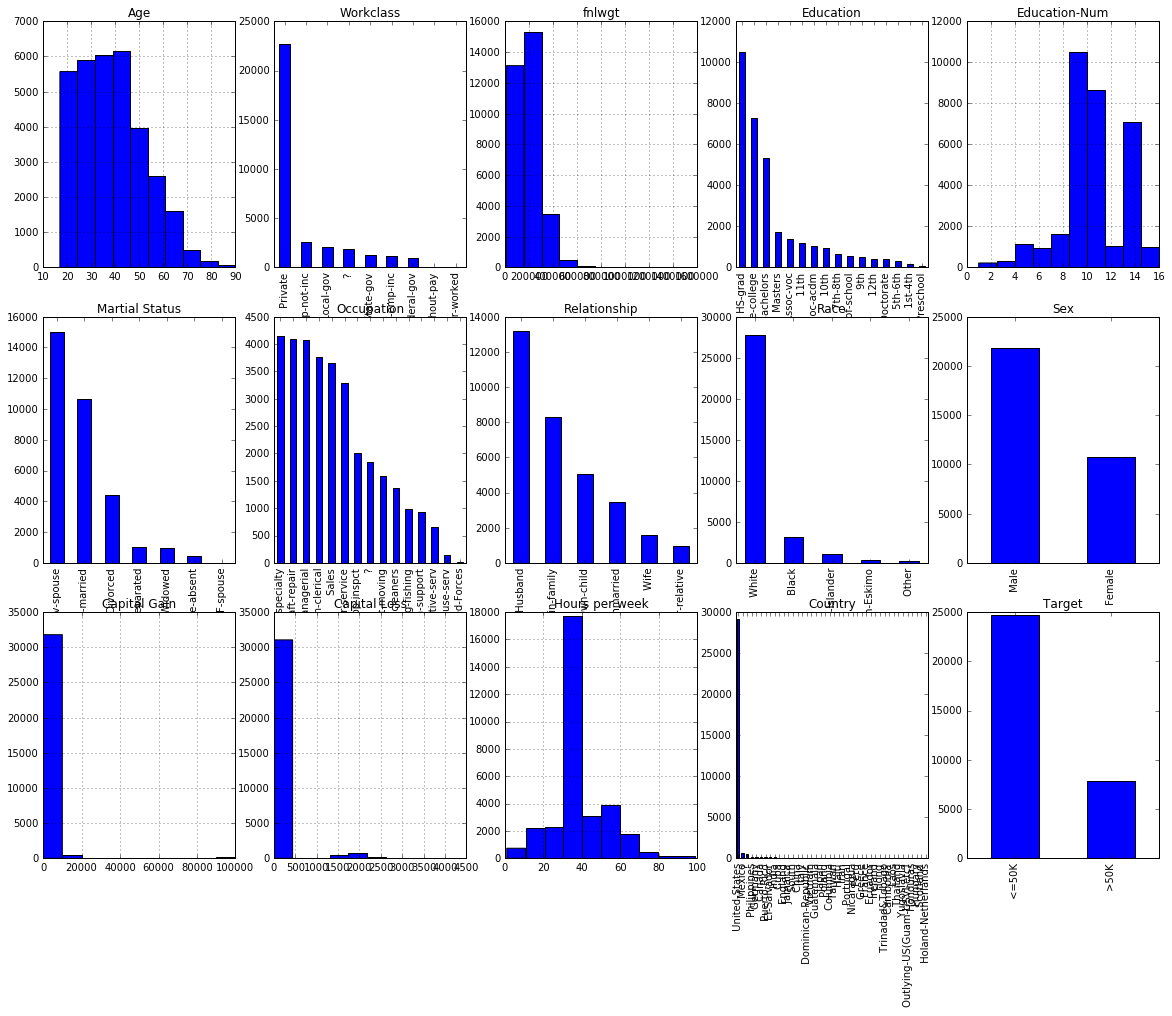

In [4]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = (data.shape[1]) / cols
for i, column in enumerate(data.columns):
    fig.add_subplot(rows, cols, i + 1).set_title(column)
   
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar")
    else:
        data[column].hist()


We could see that Most of the sample are from United States. Now lets encode the features so that we can convert the category based text values to integers.

In [5]:
def encode_features_data(df):
    result=df.copy();
    encoders={};
    for column in df.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders;

encoded_data,_= encode_features_data(data)
encoded_data.tail()
#sns.heatmap(encoded_data.corr(), square=True)
#plt.show()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
32560,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


Now We will Scale and Normalize the data so that the values of the column would be in between 0 and 1 

In [6]:
scale= preprocessing.StandardScaler()
X_train,X_test,Y_train,Y_test= cross_validation.train_test_split(encoded_data[encoded_data.columns-['Target']],encoded_data['Target'], train_size=0.7)
X_train = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns)
X_test = scale.transform(X_test)

C:\Users\skgoudax\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


F1 score: 0.551457


C:\Users\skgoudax\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


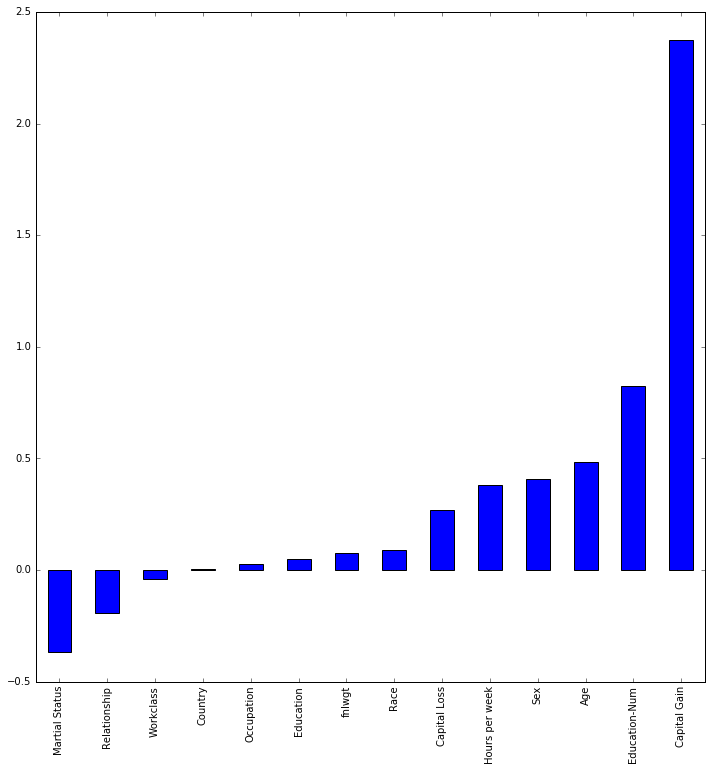

In [7]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, Y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12,12))
#plt.subplot(1,1,1)
#sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
#plt.ylabel("Real value")
#plt.xlabel("Predicted value")
print "F1 score: %f" % skl.metrics.f1_score(Y_test, y_pred)
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()

In [8]:
binary_data = pd.get_dummies(data[data.columns-['Target']])
# Let's fix the Target as it will be converted to dummy vars too

#plt.subplots(figsize=(20,20))
#sns.heatmap(binary_data.corr(), square=True)
#plt.show()

C:\Users\skgoudax\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [ ]:
binary_data['Target']= data['Target']
binary_data['Target'][2]

' <=50K'

In [ ]:
for i,row in enumerate(binary_data['Target']):
    if row == '>50K':
        binary_data['Target'][i]=1
    else:
        binary_data['Target'][i]=0

C:\Users\skgoudax\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
scale= preprocessing.StandardScaler()
X_train,X_test,Y_train,Y_test= cross_validation.train_test_split(binary_data[binary_data.columns-['Target']],binary_data['Target'], train_size=0.7)
X_train = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns)
X_test = scale.transform(X_test)

In [ ]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, Y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12,12))
#plt.subplot(1,1,1)
#sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
#plt.ylabel("Real value")
#plt.xlabel("Predicted value")
print "F1 score: %f" % skl.metrics.f1_score(Y_test, y_pred)
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()